In [1]:
import pandas as pd
import statsmodels.api as sm
import datetime
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot
df = pd.read_csv("dataset/train.csv", sep=',', parse_dates=[2])

df = df[df['Store'] == 1.0][df['Date']>datetime.date(2013,1,6)].sort_values(by='Date')
df = df[df['DayOfWeek'] != 7]
df.head(10)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1009405,1,1,2013-01-07,7176,785,1,1,0,1
1008290,1,2,2013-01-08,5580,654,1,1,0,1
1007175,1,3,2013-01-09,5471,626,1,1,0,1
1006060,1,4,2013-01-10,4892,615,1,1,0,1
1004945,1,5,2013-01-11,4881,592,1,1,0,1
1003830,1,6,2013-01-12,4952,646,1,0,0,0
1001600,1,1,2013-01-14,4717,616,1,0,0,0
1000485,1,2,2013-01-15,3900,512,1,0,0,0
999370,1,3,2013-01-16,4008,530,1,0,0,0
998255,1,4,2013-01-17,4044,503,1,0,0,0


In [2]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,803.0,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000
mean,1.0,3.496887,4604.625156,545.483188,0.967621,0.448319,0.209215
std,0.0,1.707670,1305.943349,135.961270,0.177114,0.497632,0.407002
min,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,2.000000,3935.000000,495.000000,1.000000,0.000000,0.000000
50%,1.0,3.000000,4602.000000,546.000000,1.000000,0.000000,0.000000
75%,1.0,5.000000,5327.000000,608.000000,1.000000,1.000000,0.000000
max,1.0,6.000000,9528.000000,1130.000000,1.000000,1.000000,1.000000


In [5]:
df.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DayOfWeek,NaN,1.000000,-0.033374,0.025403,0.007911,-0.262466,-0.049294
Sales,NaN,-0.033374,1.000000,0.958332,0.645382,0.378689,-0.059832
Customers,NaN,0.025403,0.958332,1.000000,0.734367,0.212561,-0.087589
Open,NaN,0.007911,0.645382,0.734367,1.000000,0.023432,-0.113477
Promo,NaN,-0.262466,0.378689,0.212561,0.023432,1.000000,0.022670
SchoolHoliday,NaN,-0.049294,-0.059832,-0.087589,-0.113477,0.022670,1.000000


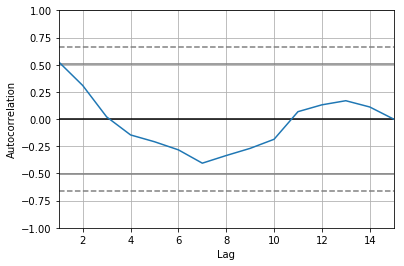

In [4]:
autocorrelation_plot(df['Sales'].head(15))

In [6]:

'''
We see that -1, -2, -3 and -4th weeks' Mondays have a correlation with this week's Monday.
'''
df['SalesMinus1'] = df['Sales'].shift(1)
df['SalesMinus2'] = df['Sales'].shift(2)
df['CustomersMinus1'] = df['Customers'].shift(1)
df['CustomersMinus2'] = df['Customers'].shift(2)
df = df.dropna()
df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesMinus1,SalesMinus2,CustomersMinus1,CustomersMinus2
1007175,1,3,2013-01-09,5471,626,1,1,0,1,5580.0,7176.0,654.0,785.0
1006060,1,4,2013-01-10,4892,615,1,1,0,1,5471.0,5580.0,626.0,654.0
1004945,1,5,2013-01-11,4881,592,1,1,0,1,4892.0,5471.0,615.0,626.0
1003830,1,6,2013-01-12,4952,646,1,0,0,0,4881.0,4892.0,592.0,615.0
1001600,1,1,2013-01-14,4717,616,1,0,0,0,4952.0,4881.0,646.0,592.0
1000485,1,2,2013-01-15,3900,512,1,0,0,0,4717.0,4952.0,616.0,646.0
999370,1,3,2013-01-16,4008,530,1,0,0,0,3900.0,4717.0,512.0,616.0
998255,1,4,2013-01-17,4044,503,1,0,0,0,4008.0,3900.0,530.0,512.0
997140,1,5,2013-01-18,4127,568,1,0,0,0,4044.0,4008.0,503.0,530.0
996025,1,6,2013-01-19,5182,688,1,0,0,0,4127.0,4044.0,568.0,503.0


In [7]:
df.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,SalesMinus1,SalesMinus2,CustomersMinus1,CustomersMinus2
Store,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DayOfWeek,NaN,1.000000,-0.029092,0.029620,0.008462,-0.260097,-0.043901,-0.183720,-0.144556,-0.195466,-0.158561
Sales,NaN,-0.029092,1.000000,0.958147,0.646582,0.376548,-0.066929,0.303327,0.234385,0.246802,0.212661
Customers,NaN,0.029620,0.958147,1.000000,0.735533,0.209827,-0.094472,0.243688,0.194514,0.225318,0.196972
Open,NaN,0.008462,0.646582,0.735533,1.000000,0.022961,-0.114913,-0.019861,-0.038924,0.000077,-0.008428
Promo,NaN,-0.260097,0.376548,0.209827,0.022961,1.000000,0.017394,0.398975,0.350571,0.274336,0.261496
SchoolHoliday,NaN,-0.043901,-0.066929,-0.094472,-0.114913,0.017394,1.000000,-0.023455,-0.010176,-0.049033,-0.039577
SalesMinus1,NaN,-0.183720,0.303327,0.243688,-0.019861,0.398975,-0.023455,1.000000,0.304198,0.958288,0.247926
SalesMinus2,NaN,-0.144556,0.234385,0.194514,-0.038924,0.350571,-0.010176,0.304198,1.000000,0.244959,0.958502
CustomersMinus1,NaN,-0.195466,0.246802,0.225318,0.000077,0.274336,-0.049033,0.958288,0.244959,1.000000,0.226555
